**Verileri rastgele ikiye bölün ve küme sayısı olarak iki, üç ve dört kullanarak k-ortalama uygulayın. Görselleştirmeyi kullanarak çözümlerin tutarlılığını değerlendirin. Hangisi en iyisi gibi görünüyor?**

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

heartdisease_df = pd.read_csv('heart.csv')

In [3]:
heartdisease_df.drop([0], axis=0, inplace=True)

In [4]:
heartdisease_df.shape   #152 ye 151 ayrılarak hata verdiği için 0. satırı sildim.

(302, 14)

In [5]:
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [6]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

X_yarı1, X_yarı2, X_pcayarı1, X_pcayarı2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [7]:
ytahmin = pd.DataFrame()

for counter, data in enumerate([
    (X_yarı1, X_pcayarı1),
    (X_yarı2, X_pcayarı2)]):
    
    ytahmin['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ytahmin['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    for nclust in range(2, 5):
        tahmin = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ytahmin['clust' + str(nclust) + '_sample' + str(counter)] = tahmin

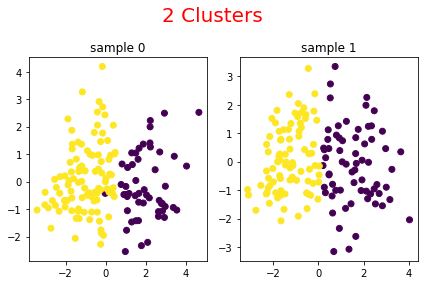

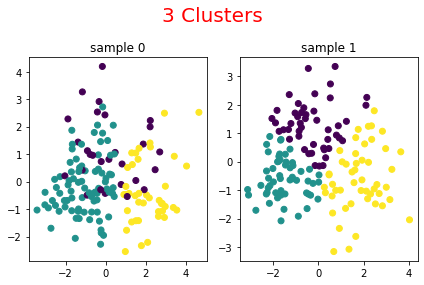

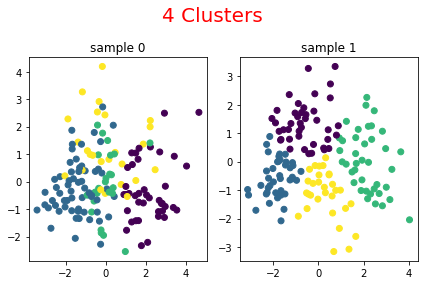

In [9]:
for cluster in range(2, 5):
    
    f, axarr = plt.subplots(1, 2)
    
    for i in range(2):
        
        x_sub = ytahmin['pca_f1_sample{}'.format(i)]
        y_sub = ytahmin['pca_f2_sample{}'.format(i)]
        
        c = ytahmin['clust{}_sample{}'.format(cluster, i)]
        
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20 , color = 'red')
    plt.tight_layout()
    plt.show()
    print('\n')

**En iyi sonucu cluster = 2 olduğunda verdi. En kötü sonucu 4 clusterda aldık. 3 cluster olduğunda sample 0 da iç içe çok geçme olmuş.**

**K veri setini tüm veri kümelerine k, iki, üç ve dört eşit olacak şekilde uygulayın ve her biri için ARI puanı alın. Hangi model en iyisidir?**

In [19]:
tam_tahmin2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
metrics.adjusted_rand_score(y, tam_tahmin2)

0.3852649724908098

In [20]:
tam_tahmin3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
metrics.adjusted_rand_score(y, tam_tahmin3)

0.25993275657669046

In [21]:
tam_tahmin4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
metrics.adjusted_rand_score(y, tam_tahmin4)

0.1843485338109366

**0'ın rastgele etiketlenmeyi ve 1'in temel gerçeğin mükemmel bir şekilde kopyalandığını gösterir. Buradaki sonuçlara baktığımızda, değerlerin rastgele etiketlenmeye yakın olduğunu gösteriyor. Temel gerçeğin mükemmel şekilde kopyalanmasına en yakın değer n_cluster = 2 olduğunda çıkmıştır. Küme sayısı arttıkça rassallık artmıştır.**

**K veri setini tüm veri kümelerine k, iki, üç ve dört eşit olacak şekilde uygulayın ve her biri için siluet katsayısı elde edin. Hangi model en iyisidir?**

In [24]:
etiketler2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler2, metric='euclidean'))

0.1692112235285204


In [25]:
etiketler3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler3, metric='euclidean'))

0.11807903510341018


In [26]:
etiketler4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler4, metric='euclidean'))

0.11979687091809245


**Değerler çok kötü kümelenmeler için -1 ile çok yoğun kümelenmeler için +1 arasında olur. Burada en iyi değer 2 olduğunda çıktı.İki küme çözümümüzün, kümedeki diğer veri noktalarına, diğer kümelerdeki veri noktalarına göre daha yakın olan veri noktası kümeleri ürettiği anlaşılıyor.**